# Big Data Applications - Coursework 1

#### Daniela Nogueira

March, 2022

# Question 1

## Mapper

For question 1, I'll create a mapper, whose output will be used as input for each reducer I'll develop to calculate the maximum, minimum, mean, median, and variance statistical metrics.


### Step 1

For the creation of this mapper, I took the data of April, produced a tiny sample from it (which you can find in the txt file named  "example_mapper.txt" in the folder where this report is placed), and tested my  Python code in  Jupyter Notebook until I was pleased with the outcomes. As a result, I was able to fully understand each line of my code and double-check each line's output until I  got my final mapper.

#### Example of what my mapper sees as input

In [1]:
file = open("example_mapper.txt","r")
file = file.readlines()
print(file)

['Wban Number, YearMonthDay, Time, Station Type, Maintenance Indicator, Sky Conditions, Visibility, Weather Type, Dry Bulb Temp, Dew Point Temp, Wet Bulb Temp, % Relative Humidity, Wind Speed (kt), Wind Direction, Wind Char. Gusts (kt), Val for Wind Char., Station Pressure, Pressure Tendency, Sea Level Pressure, Record Type, Precip. Total\n', '03011,20070401,0050,AO2 ,-,SCT055                                       ,10SM   ,-,-,23,28,69  , 4   ,130,-,0  ,30.13,-,-,AA,-\n', '03011,20070401,0150,AO2 ,-,BKN055                                       ,10SM   ,-,32,23,28,69  , 4   ,140,-,0  ,30.12,-,-,AA,-\n', '03011,20070401,0250,AO2 ,-,OVC050                                       ,10SM   ,-,-,23,28,69  , 3   ,130,-,0  ,30.12,-,-,AA,-\n', '03011,20070401,0350,AO2 ,-,OVC050                                       ,10SM   ,-,34,23,30,64  , 3   ,120,-,0  ,30.12,-,-,AA,-\n', '03011,20070401,0450,AO2 ,-,BKN050                                       ,10SM   ,-,34,23,30,64  , 4   ,130,-,0  ,30.11,-,-,A

### Pseudo code

    Read the file 

    for each line in this file:
    
        Remove beginning and ending spaces then split a string into a list with comma 
        as separator
   
        If you find non-existent values represented by "-" or values equal "Dry Bulb Temp" 
        in the "Dry Bulb Temp" column:
     
            Ignore them and move to the next value/line
        
        else:
    
            The key "day" and value "temp" are equal to column "YearMonthDay" and column
            "Dry Bulb Temp" respectively 
        
            Print keys "day" and values "temp"

### Python code

In [2]:
#! /usr/bin/env python3
import sys

for line in sys.stdin:
    val = line.strip().split(",")
    if (val[8] == "-") or (val[8].strip() == "Dry Bulb Temp"): 
        continue
    else:
        (day, temp) = (val[1], val[8])
        print ("%s\t%s" % (day, temp))

#### Lines explanation

- if (val[8] == "-") or (val[8].strip() == "Dry Bulb Temp"):

    continue

When looking at my file, I realised that there is some non-existent values represented by "-" in my columns and that I would need to remove headers "Dry Bulb Temp" and "YearMonthDay" from my output values so I set this condition.



## Step 2

After I've developed my python code for the mapper using a tiny sample from my original file "200704hourly.txt", I need to test this mapper in my Terminal/Headnote for my entire dataset "200704hourly.txt". 

#### For that I follow some steps:

1. Download data "200704hourly.txt" from VLE to my local machine/computer
2. Open two terminals: one for local computer, one for headnote (dsm1)
2. Tranfer the file "200704hourly.txt" to my headnote 
3. Create a diretory on my headnote to have my file "200704hourly.txt",  my mapper.py and all my future reducers
4. Run my mapper.py on my file

#### Code done on both terminals, Local machine and Headnote:

1. #### To access the folder which has the file "200704hourly.txt" - Local machine 

cd path

2. #### To log in - Headnote 

ssh username@dsm1.doc.gold.ac.uk

3. #### To create directory - Headnote 

mkdir coursework_1

4. #### Move to this directory - Headnote

cd coursework_1

5. #### To tranfers my "200704hourly.txt" file from local machine to Headnote -  Local machine

scp  200704hourly.txt  <username>dsm1.doc.gold.ac.uk:coursework_1/ 

6. #### To create a file for my mapper -  Headnote

touch mapper.py

7. #### To edit the file - Headnote 

nano mapper.py  

8. #### To give my python scripts the executable permission - Headnote

chmod +x mapper.py

9. #### To run my mapper.py on my file and sort the output - Headnote

cat 200704hourly.txt | ./mapper.py | sort

##### Note : In step 7, I copy my Python code which is above ( "Python code" ) into it. 

## Reducers 

To build my reducers, I also created a tiny sample example of the output of my mapper (txt file named "example_reducer.txt" in the folder where this report is placed), sorted, which will be the input of my reducers. As I did for my mapper code, I tested my code in the jupyter notebook on my sample until I reached the final reducer for all that I will create: maximum, minimum, average, median and variance.

#### Example of what all my reducers will sees as input

In [3]:
file = open("example_reducer.txt","r")
file = file.readlines()
print(file)

['20070401\t11\n', '20070401\t12\n', '20070401\t12\n', '20070401\t13\n', '20070401\t14\n', '20070402\t21\n', '20070402\t25\n', '20070402\t35\n', '20070402\t36\n', '20070403\t67\n', '20070403\t68\n', '20070403\t79\n']


### Maximum 

### Step 1

#### Pseudo code


    Read the file 
    
    Initialise your key variable "last_key" = None
    Initialise your value variable "max_val" = 0

    Start loop, for each line in this file:
    
        Initialise "key" and "val" variables = remove beginning and ending spaces then 
        split a string into a list with tab as separator
   
        If "last_key" and "last_key" differs from current "key":
            
            First, print current "last_key" and "max_val"
            
            Update "last_key" and "max_value" with currrent "key" and the integer of "val"    
            variable, respectively 
            
        else:
            
            Update "last_key" and "max_value" with currrent "key" and the maximum between   
            current "max_val" and integer of "val" variable, respectively 
        
    If "last_key":
            Print keys "last_key" and values "max_val"

####  Python code

In [4]:
#! /usr/bin/env python3
import sys

(last_key, max_val) = (None, 0)

for line in sys.stdin:
    (key, val) = line.strip().split("\t")
    if last_key and last_key != key:
        print ("%s\t%s" % (last_key, max_val))
        (last_key, max_val) = (key, int(val))
    else:
        (last_key, max_val) = (key, max(max_val, int(val)))
if last_key:
    print ("%s\t%s" % (last_key, max_val))


#### Lines explanation

When writing this code, I kept in mind that in the mapping process, same keys are grouped together and in a sequential order, such as "AAAAABBBB", so when my for loop stops seing one key, for example, "A", it will never see this key again. In addition, I took into account that the command "cat 200704hourly.txt |./mapper.py | sort" sorts all data before sending them to the reducer, which is a crucial detail for the median calculation I'll be doing later. 


### Step 2 

##### Note: this step 2 will be equal  for all measurements that follow ( minimum, mean, median and variance ), the only difference will be the name of the reducer (reducer_min.py, for example).

#### Code done on Headnote:

1. #### To Move into coursework_1  directory - Headnote

cd coursework_1

2. #### To create a file for my reducer -  Headnote

touch reducer_max.py

3. #### To edit my file - Headnote 

nano reducer_max.py  

4. #### To give my python scripts the executable permission - Headnote

chmod +x mapper.py reducer_max.py 

5. #### To run my mapper.py and reducer on my file and sort the output - Headnote

cat 200704hourly.txt | ./mapper.py | sort | ./reducer_max.py

##### Note : In step 3, I copy my Python code which is above ( "Python code" ) into it. 

### Minimum 

#### Pseudo code

    Read the file 
    
    Initialise your key variable "last_key" = None
    Initialise your value variable "min_val" = 200

    Start loop, for each line in this file:
    
        Initialise "key" and "val" variables = remove beginning and ending spaces then 
        split a string into a list with tab as separator
   
        If "last_key" and "last_key" differs from current "key":
            
            First, print current "last_key" and "min_val"
            
            Update "last_key" and "min_value" with currrent "key" and the integer of "val"    
            variable, respectively 
            
        else:
            
            Update "last_key" and "min_value" with currrent "key" and the minimum between   
            current "min_val" and integer of "val" variable, respectively 
        
    If "last_key":
            Print keys "last_key" and values "min_val"

#### Python code

In [5]:
#! /usr/bin/env python3
import sys

(last_key, min_val) = (None, 200)

for line in sys.stdin:
    (key, val) = line.strip().split("\t")
    if last_key and last_key != key:
        print ("%s\t%s" % (last_key, min_val))
        (last_key, min_val) = (key, int(val))
    else:
        (last_key, min_val) = (key, min(min_val, int(val)))
if last_key:
    print ("%s\t%s" % (last_key, min_val))


### Mean 

#### Pseudo code

    Read the file 
    
    Initialise your key variable "last_key" = None
    Initialise your value variable "mean" = 0
    Initialise a variable for total number of Observations "count" = 0
    Initialise a variable for sum of Observations  "soma" = 0

    For each line in this file:
    
        Initialise "key" and "val" variables = remove beginning and ending spaces then 
        split a string into a list with tab as separator
   
        If "last_key" and "last_key" differs from current "key":
            
            Print current "last_key" and "mean"
            
            Reset "count" to zero
           
            Reset "soma" to zero
            
            Update "last_key" and "mean" with currrent "key" and the float of "val"    
            variable, respectively 
            
            Increment "count"
            
            Add current "val" to "soma"
            
        else:
            
            Increment "count"
            
            Add current "val" to "soma"
            
            Update "last_key" and "mean" with currrent "key" and the rounded value 
            resulting from dividing "soma" by "count", respectively 
        
    If "last_key":
            Print keys "last_key" and values "mean"

#### Python code 

In [6]:
#! /usr/bin/env python3
import sys


(last_key, mean) = (None, 0)
count = 0
soma = 0

for line in sys.stdin:
    (key, val) = line.strip().split("\t")
    if last_key and last_key != key:
        print ("%s\t%s" % (last_key, mean))
        count = 0
        soma = 0
        (last_key, mean) = (key, float(val))
        count += 1
        soma  += int(val)
    else:
        count += 1 
        soma += int(val)
        (last_key, mean) = (key, round(float(soma/count),2))

if last_key:
    print ("%s\t%s" % (last_key, mean))

### Median 

#### Pseudo code

    Read the file 
    
    Initialise your key variable "last_key" = None
    
    Initialise your value variable "median" = 0
    
    Create and empty list named, for example, "lista", in order for you to be able to store 
    the values of each key and be able to access them  by their position in  
    the that list
    

    For each line in this file:
    
        Initialise "key" and "val" variables = remove beginning and ending spaces then 
        split a string into a list with tab as separator
   
        If "last_key" and "last_key" differs from current "key":
            
            Print current "last_key" and "median"
            
            Reset "lista" to an empty list
            
            Update "last_key" and "median" with currrent "key" and the integer of "val"    
            variable, respectively 
            
            Append the current "val" to your list
            
        else:
            
            Append the current "val" to your list
            
            Create a condition for when number of elements belonging to a key is even:
               
                 Update "last_key" and "median" with currrent "key" and the value 
                 resulting from dividing the two middle numbers in the sorted "lista" 
                 by 2, respectively
             
            else:
              
                 Update "last_key" and "median" with currrent "key" and the middle number 
                 in the sorted "lista", respectively    
          
          
    If "last_key":
            Print keys "last_key" and values "median"

#### Python code

In [7]:
#! /usr/bin/env python3
import sys

(last_key, median) = (None, 0)
lista=[]

for line in sys.stdin:
    (key, val) = line.strip().split("\t")
    if last_key and last_key != key:
        print ("%s\t%s" % (last_key, median))
        lista=[]
        (last_key, median) = (key, int(val))
        lista.append(int(val))
    else:
        lista.append(int(val))
        if (len(lista)%2)==0:            
            (last_key, median) = (key, (((lista[int(len(lista)/2)])+(lista[int(len(lista)/2)-1]))/2))
        else:
            (last_key, median) = (key,lista[int(len(lista)/2)])                               
                              
if last_key:
    print ("%s\t%s" % (last_key, median))

    

### Variance 


#### Pseudo code

    Read the file 
    
    Initialise your key variable "last_key" = None
    Initialise your value variable "variance" = 0
    Initialise a variable for total number of Observations "count" = 0
    Initialise a variable for sum of Observations  "soma" = 0
    Initialise a variable "mean" = 0
    initialise a variable "squared" = 0

    For each line in this file:
    
        Initialise "key" and "val" variables = remove beginning and ending spaces then 
        split a string into a list with tab as separator
   
        If "last_key" and "last_key" differs from current "key":
            
            Print current "last_key" and "variance"
            
            Reset "count" to zero
            
            Reset "soma" to zero
            
            Reset "mean" to zero
            
            Reset "squared" to zero 
            
            Update "last_key" and "variance" with currrent "key" and the float of "val"    
            variable, respectively 
            
            Increment "count"
            
            Add current "val" to "soma"
            
            Add the value resulting from current "val" multiplied by itself to "squared"
            
            Equal the variable "mean" the float value resulting resulting from dividing
            "soma" by "count"
            
        else:
            
            Increment "count"
            
            Add current "val" to "soma"
            
            Add to the variable "squared" the value resulting from current "val" multiplied 
            by itself 
            
            Equal the variable "mean" the float value resulting resulting from dividing 
            "soma" by "count"
            
            Update "last_key" and "variance" with currrent "key" and the sum of the squared 
            differences between each data point and the mean divided by the number of data
            values, respectively 
        
    If "last_key":
            Print keys "last_key" and values "variance"

#### Python code

In [8]:
#! /usr/bin/env python3
import sys

(last_key, variance) = (None, 0)
count = 0
soma = 0
mean =0
squared = 0

for line in sys.stdin:
    (key, val) = line.strip().split("\t")
    if last_key and last_key != key:
        print ("%s\t%s" % (last_key, variance))
        count = 0
        soma = 0
        mean = 0
        squared = 0
        (last_key, variance) = (key, float(val))
        count += 1
        soma  += int(val)
        squared += int(val)**2
        mean = float(soma/count)
    else:
        count += 1 
        soma += int(val)
        squared += int(val)**2
        mean = float(soma/count)
        
        (last_key, variance) = (key, round((squared-count*mean**2)/count,2))

if last_key:
    print ("%s\t%s" % (last_key, variance))


### Hadoop infrastructure


When using Hadoop, we are mainly saying "do this job using multiple nodes/computers".

#### If we want to run our mapper and reducers using the hadoop infrastructure, we need to follow this steps:

##### Note: these steps will be equal  for all reducers that follow ( minimum, mean, median and variance ), the only difference will be the name of the reducer (reducer_min.py, for example).

1. #### Log in - Headnote

ssh username@dsm1.doc.gold.ac.uk

2. #### Go to coursework_1 directory

cd coursework_1

2. #### Copy 200704hourly.txt file from Headnote filesystem to HDFS

hadoop fs -copyFromLocal 200704hourly.txt .

3. #### MapReduce in Python with Hadoop Streaming 

hadoop jar /usr/local/hadoop-2.6.0/share/hadoop/tools/lib/hadoop-streaming-2.6.0.jar \
  -file mapper.py -mapper mapper.py \
  -file reducer_max.py -reducer reducer.py \
  -input 200704hourly.txt -output output
  
5. #### Get output and tranfer it from HDFS to Headnote

hadoop fs -copyToLocal output

6. #### Open another terminal (Local machine) and get output file and tranfer it from Headnote to local machine

scp -r username@dsm1.doc.gold.ac.uk:coursework_1/output/  max_output


# Question 2

### STEP 1

### Code done on Terminal

#### Part 1: Getting data

1. #### Log in to dsm1 

ssh username@dsm1.doc.gold.ac.uk

2. #### Create a directory for question 2

mkdir ./docs

3. #### Download our text data  

wget http://www.doc.gold.ac.uk/~agero001/data_science/lab_data/western_classics.zip

4. #### Uncompress the data

unzip western_classics.zip 

5. #### Copy all the files in the western_classics/british-fiction-corpus/ directory into the docs/ directory

cp ./western_classics/british-fiction-corpus/* ./docs/ 

6. #### Tranfer the docs directory from the headnote to hadoop

hadoop fs -copyFromLocal ./docs 


#### Part 2: Mahout

1. #### Create sequence files from the raw text using Mahout

mahout seqdirectory -i docs -o docs-seqfiles -c UTF-8 -chunk 5 

2. #### Create a sparse (efficient) representation of the vectors using Mahout

mahout seq2sparse -nv -i docs-seqfiles -o docs-vectors

3. #### Generate “canopies”, which will help approximate centroids for K-Means

mahout canopy -i docs-vectors/tfidf-vectors -ow -o docs-vectors/docs-canopy-centroids -dm org.apache.mahout.common.distance.CosineDistanceMeasure -t1 0.5 -t2 0.3

4. #### Run the K-Means algorithm with Mahout

mahout kmeans -i docs-vectors/tfidf-vectors -c docs-canopy-centroids -o docs-kmeans-clusters -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 20 -k 3

5. #### Look to find the ‘final’ iteration’s clustering solution

hadoop fs -ls docs-kmeans-clusters

6. #### Evaluate solution

mahout clusterdump -dt sequencefile -d docs-vectors/dictionary.file-* -i docs-kmeans-clusters/clusters-2-final -o clusters.txt -b 100 -p docs-kmeans-clusters/clusteredPoints -n 20 --evaluate

7. #### Look at the end of the clusters.txt file 

tail ./clusters.txt

As the coursework demands, I'll need to change the value of k, which is the number of clusters, as well as the distance measurements and loose and tight distances (t1 and t2). In my terminal code, I applied some adjustments in stages 3, 4, 6 (part 2)  to do this. For this exercise, I'll test two distance measures: Cosine and Euclidean, for values of k = [3,5,7,10,12,15,18,20]. I chose t1 = 0.5 and t2 = 0.3  for Cosine distance, and t1 = 2000 and t2 = 1500 for Euclidean distance.

### STEP 2: Output and graphs

Clustering is the partition of all data into groups, usually referred to as clusters, based on data patterns. We want the distance between points within a cluster (intra cluster distance) to be as small as possible because we want them to be as similar as possible. When the distance between the centroid of a cluster and its points is small, it means the points are close together and the cluster is dense. Different clusters, on the other hand, should be as distinct as possible from one another. The distance between the centroids of two separate clusters is known as inter cluster distance.

Inter-cluster density is defined as the density in the between-cluster areas, so the higher the better. In contrast, the smaller the intra-cluster density the better.

K-means is a distance-based technique in which the distances between points are calculated to allocate a point to a cluster. Each cluster in K-Means is paired with a centroid. Due to its relative ease of implementation and ability to scale well to very big datasets, k-means is one of the most common clustering methods. Because k-means is stochastic, it cannot guarantee the discovery of the global optimum clustering solution. In fact, outliers and noisy data can make the method extremely sensitive, and the ultimate clustering quality can be heavily influenced by the location of the initial cluster centroids. To put it another way, k-means is more likely to find a local minimum than a global one. Even if the original cluster centroids are well-placed, if clusters are not roughly equal in size and density, non-optimal clustering may result.

#### Output Cosine Distance

In [9]:
k = [3,5,7,10,12,15,18]

Inter_Cluster_Density = [0.4451541533194988, 0.49600669221521704, 0.38408398901491614, 0.44024282086510436, 0.30294968661751115, 0.2806005998602275, 0.2806005998602275]

Intra_Cluster_Density = [0.571138465446429, 0.5544161655101385, 0.5854214453055803, 0.5352731664030042, 0.5550501341933015, 0.5238968941109691, 0.5238968941109691]


In [10]:
Inter_Cluster_Density  = [round(num,4) for num in Inter_Cluster_Density]

Intra_Cluster_Density  = [round(num,4) for num in Intra_Cluster_Density]

print(Inter_Cluster_Density)
print(Intra_Cluster_Density)


[0.4452, 0.496, 0.3841, 0.4402, 0.3029, 0.2806, 0.2806]
[0.5711, 0.5544, 0.5854, 0.5353, 0.5551, 0.5239, 0.5239]


In [11]:
import pandas as pd

cosine = pd.DataFrame(list(zip(k,Inter_Cluster_Density, Intra_Cluster_Density)), 
                      columns =['K','Inter Cluster Density', 'Intra Cluster Density'])

cosine

,K,Inter Cluster Density,Intra Cluster Density
0,3,0.4452,0.5711
1,5,0.4960,0.5544
2,7,0.3841,0.5854
3,10,0.4402,0.5353
4,12,0.3029,0.5551
5,15,0.2806,0.5239
6,18,0.2806,0.5239


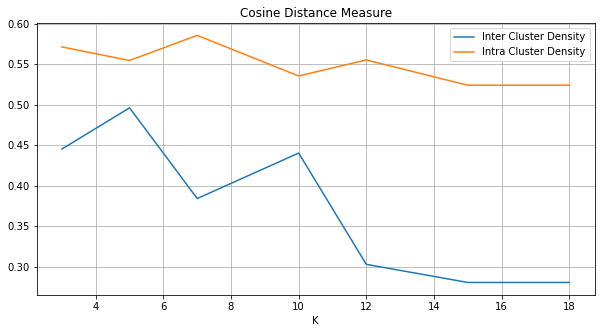

In [12]:
import matplotlib.pyplot as plt

cosine.plot(x='K', y=['Inter Cluster Density', 'Intra Cluster Density'], figsize=(10,5), grid=True)

plt.title("Cosine Distance Measure")
plt.show()


#### Output Euclidean Distance

In [13]:
k = [3,5,7,10,12,15,18]

Inter_Cluster_Density = [0.44235517474526337, 0.43561763349095555, 0.4845228365262356, 0.4892239530039184, 0.4527599563499537, 0.35054530260649825, 0.33154761269679123]
Intra_Cluster_Density = [0.5891069114004185, 0.5768438483444104, 0.609261366893357, 0.5290949105069825, 0.5568836784456709, 0.5259668105185436, 0.4897441022857345]



In [14]:
Inter_Cluster_Density  = [round(num,4) for num in Inter_Cluster_Density]

Intra_Cluster_Density  = [round(num,4) for num in Intra_Cluster_Density]

print(Inter_Cluster_Density)
print(Intra_Cluster_Density)

[0.4424, 0.4356, 0.4845, 0.4892, 0.4528, 0.3505, 0.3315]
[0.5891, 0.5768, 0.6093, 0.5291, 0.5569, 0.526, 0.4897]


In [15]:
euclidean = pd.DataFrame(list(zip(k,Inter_Cluster_Density, Intra_Cluster_Density)), 
                      columns =['K','Inter Cluster Density', 'Intra Cluster Density'])

euclidean 

,K,Inter Cluster Density,Intra Cluster Density
0,3,0.4424,0.5891
1,5,0.4356,0.5768
2,7,0.4845,0.6093
3,10,0.4892,0.5291
4,12,0.4528,0.5569
5,15,0.3505,0.5260
6,18,0.3315,0.4897


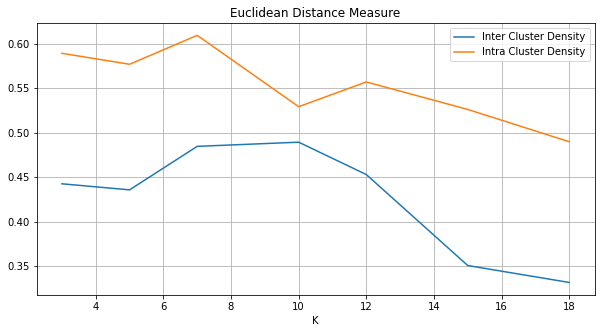

In [16]:
euclidean.plot(x='K', y=['Inter Cluster Density', 'Intra Cluster Density'], figsize=(10,5), grid=True)

plt.title("Euclidean Distance Measure")
plt.show()

### Analysis of the two graphs and distance measures

We can see that both graphs present curves with fluctuations, especially between K values between 3 and 10. However, we can also see that for both distance measures, 10 seems the appropriate number of clusters because adding another cluster does not seem to improve much  the partition. Additonally, for k=10, we have relatively good inter and intra cluster densities values, 0.4402 and 0.5353 for cosine distance and 0.4892 and 0.5291 for euclidean distance, respectively. We can also say that k<10 may be too few presenting in general numerous long distances from points to the centroid, and k>10 maybe be too many, resulting in little improvements in average distance. 

Because cosine distance considers the angle between vectors rather than their weight or magnitude, it is commonly employed as a metric for calculating distance when the magnitude of the vectors is irrelevant. When working with text data represented by word counts, for example, this can happen. Euclidean distance is the length of a line segment between the two points. The distance between any two points is not influenced by the addition of new objects to the study, which may be outliers, which is one advantage of this method.

To summarise, Cosine measure distance and 10 as the number of clusters appear to be the best solution for all of the reasons stated above.


### Limitations of MapReduce methodology and Hadoop’s MapReduce computing engine

Because MapReduce is mainly meant for batch processing jobs, interactive jobs and models are impossible to implement. Furthermore, jobs that are interdependent cannot be parallelized, which is not achievable with MapReduce.  It  struggles to tackle problems that aren't easily recombinable.

The MapReduce framework in Hadoop reads and writes data to and from disc. The data is read from and written to the disc at each stage of the processing process. Because disc seeks require time, the entire operation takes a long time. Hadoop is relatively slow for processing tiny amounts of data. Large data sets are suitable for it. Hadoop's performance for real-time processing is limited due to the batch processing engine at its core. Hadoop's Map-Reduce framework is incapable of handling real-time data. Hadoop works in batches to process data. The user must first load the file into HDFS. The user then does a map-reduce operation using the file as input.

## References

- A Statistical Density-Based Analysis of Graph Clustering Algorithm Performance - https://arxiv.org/pdf/1906.02366.pdf

- MapReduce Algorithms for k-means Clustering https://stanford.edu/~rezab/classes/cme323/S16/projects_reports/bodoia.pdf

- K-Means clustering on MapReduce - https://web2.qatar.cmu.edu/~mhhammou/15440-f19/recitations/Project4_Handout.pdf

- Elbow Method for optimal value of k in KMeans - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

- Hadoop – Pros and Cons - https://www.geeksforgeeks.org/hadoop-pros-and-cons/